In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import scipy.stats as stats

from scipy.stats import skew, kurtosis

import seaborn as sns

import statistics as stat

#Loading the CSV of the default dataset
df = pd.read_csv(r'C:\Users\mmorg\Desktop\D207 Assessment Files\medical_clean.csv')

#Turn categorical values into quantitative data
df['Marital_numeric'] = df['Marital']
dict_marital = {"Marital_numeric": {"Never Married": 0,"Separated": 1,"Widowed": 2,"Divorced": 3, "Married": 4}}
df.replace(dict_marital, inplace=True)

df['Gender_numeric'] = df['Gender']
dict_gender = {"Gender_numeric": {"Prefer not to answer": 0,"Male": 1,"Female": 2}}
df.replace(dict_gender, inplace=True)

df['ReAdmis_numeric'] = df['ReAdmis']
dict_ReAdmis = {"ReAdmis_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_ReAdmis, inplace=True)

df['Soft_drink_numeric'] = df['Soft_drink']
dict_Soft_drink = {"Soft_drink_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_Soft_drink, inplace=True)

df['Initial_admin_numeric'] = df['Initial_admin']
dict_Initial_admin = {"Initial_admin_numeric": {"Emergency Admission": 0, "Elective Admission": 1,"Observation Admission": 2}}
df.replace(dict_Initial_admin, inplace=True)

df['HighBlood_numeric'] = df['HighBlood']
dict_HighBlood = {"HighBlood_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_HighBlood, inplace=True)

df['Stroke_numeric'] = df['Stroke']
dict_stroke = {"Stroke_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_stroke, inplace=True)

df['Complication_risk_numeric'] = df['Complication_risk']
dict_complication = {"Complication_risk_numeric": {"Low": 0, "Medium": 1, "High": 2}}
df.replace(dict_complication, inplace=True)

df['Arthritis_numeric'] = df['Arthritis']
dict_arthritis = {"Arthritis_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_arthritis, inplace=True)

df['Diabetes_numeric'] = df['Diabetes']
dict_diabetes = {"Diabetes_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_diabetes, inplace=True)

df['Hyperlipidemia_numeric'] = df['Hyperlipidemia']
dict_hyperlipidemia = {"Hyperlipidemia_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_hyperlipidemia, inplace=True)

df['BackPain_numeric'] = df['BackPain']
dict_backpain = {"BackPain_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_backpain, inplace=True)

df['Allergic_rhinitis_numeric'] = df['Allergic_rhinitis']
dict_allergies = {"Allergic_rhinitis_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_allergies, inplace=True)

df['Reflux_esophagitis_numeric'] = df['Reflux_esophagitis']
dict_reflux = {"Reflux_esophagitis_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_reflux, inplace=True)

df['Asthma_numeric'] = df['Asthma']
dict_asthma = {"Asthma_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_asthma, inplace=True)

df['Services_numeric'] = df['Services']
dict_services = {"Services_numeric": {"Blood Work": 0, "Intravenous": 1, "CT Scan": 2, "MRI": 3}}
df.replace(dict_services, inplace=True)

##Univariate Stats Dataframe
def unistats(df):
    output_df = pd.DataFrame(columns=['Count', 'Missing', 'Unique', 'Dtype', 'Numeric', 'Mean', 'Mode', 'Min', '25%', 'Median', '75% Quartile', 'Max', 'Std', 'Skew', 'Kurt'])
    
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, pd.api.types.is_numeric_dtype(df[col]), df[col].mean(), df[col].mode().values[0], df[col].min(), df[col].quantile(.25), df[col].median(), df[col].quantile(.75), df[col].max(), df[col].std(), df[col].skew(), df[col].kurtosis()]
        else:
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, pd.api.types.is_numeric_dtype(df[col]), '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
    return output_df.sort_values(by=['Numeric', 'Skew', 'Unique'], ascending=False)

df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'County', 'Zip', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], inplace=True)
print(unistats(df))

                            Count  Missing  Unique    Dtype  Numeric  \
vitD_supp                   10000        0       6    int64     True   
Stroke_numeric              10000        0       2    int64     True   
Children                    10000        0      11    int64     True   
Income                      10000        0    9993  float64     True   
Soft_drink_numeric          10000        0       2    int64     True   
Services_numeric            10000        0       4    int64     True   
Diabetes_numeric            10000        0       2    int64     True   
Full_meals_eaten            10000        0       8    int64     True   
Asthma_numeric              10000        0       2    int64     True   
Additional_charges          10000        0    9418  float64     True   
Hyperlipidemia_numeric      10000        0       2    int64     True   
Arthritis_numeric           10000        0       2    int64     True   
ReAdmis_numeric             10000        0       2    int64     

In [4]:
# Bivariate: Numeric to numeric: Correlation
# Bivariate: Numeric to categorical: one-way ANOVA (3+ groups) or t-test (2 groups)
# Bivariate: categorical to categorical: Chi-square

def bivstats(df, label): 
   from scipy import stats
   import pandas as pd
    
   #Create an empty dataframe to store output
   output_df = pd.DataFrame(columns=['r', 'p-value'])
    
   for col in df: 
       if pd.api.types.is_numeric_dtype(df[col]): #Only calculate r, p-value, for numeric columns
           r, p = stats.pearsonr(df[label], df[col])
           output_df.loc[col] = [round(r, 3), round(p, 3)]
                 
   return output_df.sort_values(by=['p-value'], ascending=True)

bivstats(df, 'ReAdmis_numeric')

,r,p-value
ReAdmis_numeric,1.000,0.000
TotalCharge,0.844,0.000
Initial_days,0.851,0.000
Children,0.024,0.019
Initial_admin_numeric,-0.018,0.069
Asthma_numeric,-0.017,0.087
Age,0.016,0.114
Services_numeric,0.014,0.152
Additional_charges,0.014,0.173
BackPain_numeric,0.013,0.183


In [5]:
##Selected Initial_days for t-test due to low p-value
stats.ttest_ind(df['ReAdmis_numeric'], df['Initial_days'])

Ttest_indResult(statistic=-129.54592813419822, pvalue=0.0)

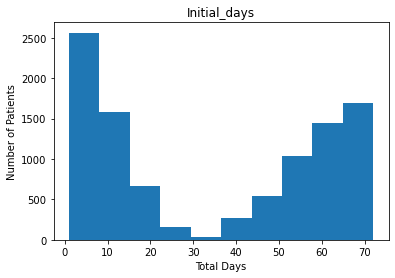

Initial Days Stats
min: 1.001980919
25th Quantile: 7.896214698
50th Quantile: 35.83624435
75th Quantile: 61.16102
max: 71.98149
mean: 34.45529926595239
median: 35.83624435
mode: 63.54432
Std: 26.30934131161786
skew: 0.07028608266045329
kurtosis: -1.7545246170896873


In [6]:
##Initial_days distribution
plt.hist(df.Initial_days)
plt.xlabel('Total Days')
plt.ylabel('Number of Patients')
plt.title('Initial_days')
plt.show()

##Initial_days univariate statistics
print('Initial Days Stats')
print('min:', df.Initial_days.min())
print('25th Quantile:', df.Initial_days.quantile(.25))
print('50th Quantile:', df.Initial_days.quantile(.50))
print('75th Quantile:', df.Initial_days.quantile(.75))
print('max:', df.Initial_days.max())
print('mean:', df.Initial_days.mean())
print('median:', df.Initial_days.median())
print('mode:', df.Initial_days.mode().values[0])
print('Std:', df.Initial_days.std())
print('skew:', skew(df.Initial_days, bias=False))
print('kurtosis:', kurtosis(df.Initial_days, bias=False))

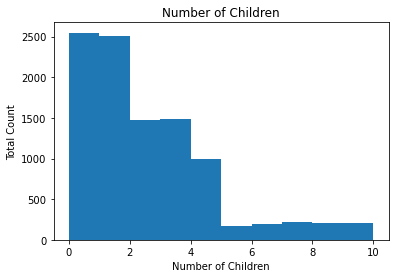

Children Stats
min: 0
25th Quantile: 0.0
50th Quantile: 1.0
75th Quantile: 3.0
max: 10
mean: 2.0972
median: 1.0
mode: 0
Std: 2.16365900779899
skew: 1.4480126219332756
kurtosis: 2.076321273332364


In [7]:
##Children distribution
plt.hist(df.Children)
plt.xlabel('Number of Children')
plt.ylabel('Total Count')
plt.title('Number of Children')
plt.show()

##Children univariate statistics
print('Children Stats')
print('min:', df.Children.min())
print('25th Quantile:', df.Children.quantile(.25))
print('50th Quantile:', df.Children.quantile(.50))
print('75th Quantile:', df.Children.quantile(.75))
print('max:', df.Children.max())
print('mean:', df.Children.mean())
print('median:', df.Children.median())
print('mode:', df.Children.mode().values[0])
print('Std:', df.Children.std())
print('skew:', skew(df.Children, bias=False))
print('kurtosis:', kurtosis(df.Children, bias=False))

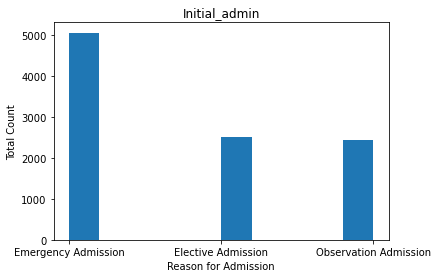

Initial_admin_numeric Stats
min: 0
25th Quantile: 0.0
50th Quantile: 0.0
75th Quantile: 1.0
max: 2
mean: 0.7376
median: 0.0
mode: 0
Std: 0.8251147322840162
skew: 0.5191601076816872
kurtosis: -1.3392723170631167


In [8]:
##Initial_admin distribution
plt.hist(df.Initial_admin)
plt.xlabel('Reason for Admission')
plt.ylabel('Total Count')
plt.title('Initial_admin')
plt.show()

##Initial_admin_numeric univariate statistics
print('Initial_admin_numeric Stats')
print('min:', df.Initial_admin_numeric.min())
print('25th Quantile:', df.Initial_admin_numeric.quantile(.25))
print('50th Quantile:', df.Initial_admin_numeric.quantile(.50))
print('75th Quantile:', df.Initial_admin_numeric.quantile(.75))
print('max:', df.Initial_admin_numeric.max())
print('mean:', df.Initial_admin_numeric.mean())
print('median:', df.Initial_admin_numeric.median())
print('mode:', df.Initial_admin_numeric.mode().values[0])
print('Std:', df.Initial_admin_numeric.std())
print('skew:', skew(df.Initial_admin_numeric, bias=False))
print('kurtosis:', kurtosis(df.Initial_admin_numeric, bias=False))

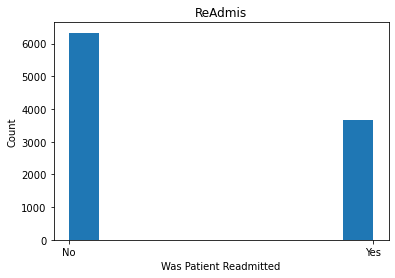

ReAdmis_numeric Stats
min: 0
25th Quantile: 0.0
50th Quantile: 0.0
75th Quantile: 1.0
max: 1
mean: 0.3669
median: 0.0
mode: 0
Std: 0.48198300878982964
skew: 0.5524121095443897
kurtosis: -1.695179937226946


In [9]:
##ReAdmis_numeric distribution
plt.hist(df.ReAdmis)
plt.xlabel('Was Patient Readmitted')
plt.ylabel('Count')
plt.title('ReAdmis')
plt.show()

##ReAdmis_numeric univariate statistics
print('ReAdmis_numeric Stats')
print('min:', df.ReAdmis_numeric.min())
print('25th Quantile:', df.ReAdmis_numeric.quantile(.25))
print('50th Quantile:', df.ReAdmis_numeric.quantile(.50))
print('75th Quantile:', df.ReAdmis_numeric.quantile(.75))
print('max:', df.ReAdmis_numeric.max())
print('mean:', df.ReAdmis_numeric.mean())
print('median:', df.ReAdmis_numeric.median())
print('mode:', df.ReAdmis_numeric.mode().values[0])
print('Std:', df.ReAdmis_numeric.std())
print('skew:', skew(df.ReAdmis_numeric, bias=False))
print('kurtosis:', kurtosis(df.ReAdmis_numeric, bias=False))

<AxesSubplot:xlabel='Initial_days', ylabel='Count'>

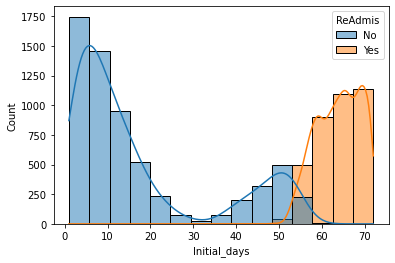

In [10]:
sns.histplot(data=df, x="Initial_days", hue="ReAdmis", kde=True)

In [11]:
cor = df['Initial_days'].corr(df['ReAdmis_numeric'])
print(cor)

0.8508616016470936


<AxesSubplot:xlabel='Children', ylabel='Count'>

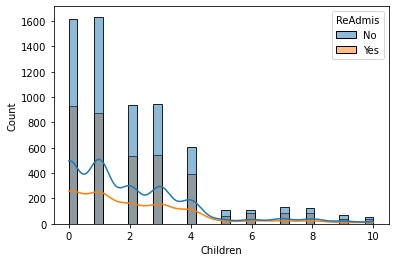

In [12]:
sns.histplot(data=df, x="Children", hue="ReAdmis", kde=True)

In [13]:
cor = df['Children'].corr(df['ReAdmis_numeric'])
print(cor)

0.0235315217234477


<AxesSubplot:xlabel='Initial_admin', ylabel='Count'>

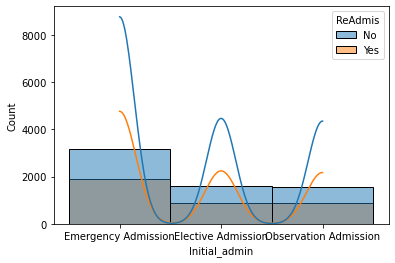

In [14]:
sns.histplot(data=df, x="Initial_admin", hue="ReAdmis", kde=True)

In [15]:
cor = df['Initial_admin_numeric'].corr(df['ReAdmis_numeric'])
print(cor)

-0.018170281715283412
